In [462]:
import os
import sys
import yaml
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_ai_openscale import APIClient
from ibm_ai_openscale.engines import *
from ibm_ai_openscale.utils import *
from ibm_ai_openscale.supporting_classes import PayloadRecord, Feature
from ibm_ai_openscale.supporting_classes.enums import *
import requests
from ibm_ai_openscale.utils import get_instance_guid
import ibm_watson_machine_learning
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson_openscale import *
from ibm_watson_openscale.supporting_classes.enums import *
from ibm_watson_openscale.supporting_classes.payload_record import PayloadRecord
import ibm_watson_openscale


with open("../credentials.yaml") as stream:
    try:
        credentials = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)


with open("../metadata.yaml") as stream:
    try:
        metadata = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)


service_credentials = {
    "apikey": credentials["apikey"],
    "url": "https://api.aiopenscale.cloud.ibm.com",
}

DEPLOYMENT_UID = metadata["deployment_uid"]
MODEL_UID = metadata["model_uid"]
MODEL_NAME = metadata["project_name"] + "_" + metadata["project_version"]
SPACE_ID = credentials["space_id"]
WOS_GUID = get_instance_guid(api_key=service_credentials["apikey"])
WOS_CREDENTIALS = {
    "instance_guid": WOS_GUID,
    "apikey": service_credentials["apikey"],
    "url": "https://api.aiopenscale.cloud.ibm.com",
}

if WOS_GUID is None:
    print("Watson OpenScale GUID NOT FOUND")
else:
    print(WOS_GUID)
    
ai_client = APIClient(aios_credentials=WOS_CREDENTIALS)
print(ai_client.version)

wml_credentials = {"url": credentials["url"], "apikey": credentials["apikey"]}

wml_client = ibm_watson_machine_learning.APIClient(wml_credentials)

wml_credentials = {
    "url": credentials["url"],
    "apikey": credentials["apikey"],
    "instance_id": "wml_local",
}

wml_client.set.default_space("16148a4d-9055-4220-af26-')
plt.show()

authenticator = IAMAuthenticator(apikey=credentials["apikey"])
wos_client = ibm_watson_openscale.APIClient(
    authenticator=authenticator, 
    service_url="https://api.aiopenscale.cloud.ibm.com")




7b220d7b-3196-43c3-8510-a4f710021a04


TypeError: __init__() got an unexpected keyword argument 'aios_credentials'

In [292]:

KEEP_MY_INTERNAL_POSTGRES = True
DB_CREDENTIALS = None
try:
    data_mart_details = ai_client.data_mart.get_details()
    if (
        "internal_database" in data_mart_details
        and data_mart_details["internal_database"]
    ):
        if KEEP_MY_INTERNAL_POSTGRES:
            print("Using existing internal datamart.")
        else:
            if DB_CREDENTIALS is None:
                print(
                    "No postgres credentials supplied. Using existing internal datamart"
                )
            else:
                print("Switching to external datamart")
                ai_client.data_mart.delete(force=True)
                ai_client.data_mart.setup(db_credentials=DB_CREDENTIALS)
    else:
        print("Using existing external datamart")
except:
    if DB_CREDENTIALS is None:
        print("Setting up internal datamart")
        ai_client.data_mart.setup(internal_db=True)
    else:
        print("Setting up external datamart")
        try:
            ai_client.data_mart.setup(db_credentials=DB_CREDENTIALS)
        except:
            print("Setup failed, trying Db2 setup")
            ai_client.data_mart.setup(
                db_credentials=DB_CREDENTIALS, schema=DB_CREDENTIALS["username"]
            )
data_mart_details = ai_client.data_mart.get_details()

binding_uid = ai_client.data_mart.bindings.add(
    "Rain Aus", WatsonMachineLearningInstance(wml_credentials)
)

bindings_details = ai_client.data_mart.bindings.get_details()

if binding_uid is None:
    binding_uid = [
        binding["metadata"]["guid"]
        for binding in bindings_details["service_bindings"]
        if binding["entity"]["name"] == "WML Cloud Instance"
    ][0]
ai_client.data_mart.bindings.list()

ai_client.data_mart.bindings.list_assets(binding_uid=binding_uid)

Using existing internal datamart.
Operation 'engine binding' is supported for Watson Machine Learning in Dallas or Frankfurt regions
Warning during bind instance.
Status code: 409, body: {"errors":[{"code":"AIQCS0010W","message":"Service Binding with this id is already defined"}],"trace":"NWRlMDQ0NmQtNDRkZS00MjcwLWIyYWEtYTAwYjk2Y2M5N2Vm"}


wml_local,Rain Australia,watson_machine_learning,2021-04-04T21:16:49.550Z
974615e0-4c06-40a3-af1f-944192f7e472,Rain Aus,watson_machine_learning,2021-04-01T18:34:08.733Z


Status code: 500, body: {"trace":"java.lang.RuntimeException: AIQGS0023E : BindingOrInstanceId = wml_local, ServiceType = watson_machine_learning, SubscriptionId = null : GetDeployments failed org.apache.http.client.ClientProtocolException: AIQGS0167E : HTTP call failed (no of calls attempted = 1, method = GET, url = https://us-south.ml.cloud.ibm.com/v3/wml_instances/wml_local/deployments, status = 403)..\n\tat com.ibm.aios.mlgateway.discovery.impl.WMLDeployments.getDeploymentCollectionBySpaceId(WMLDeployments.java:399)\n\tat com.ibm.aios.mlgateway.discovery.impl.WMLDeployments.getDeploymentCollection(WMLDeployments.java:247)\n\tat com.ibm.aios.mlgateway.discovery.impl.WMLDeployments.getDeployments(WMLDeployments.java:224)\n\tat com.ibm.aios.mlgateway.api.server.impl.DeploymentCollectionFactory.getDeploymentCollection(DeploymentCollectionFactory.java:102)\n\tat com.ibm.aios.mlgateway.api.server.impl.V1ApiServiceImpl.getDeploymentsByBindingId(V1ApiServiceImpl.java:185)\n\tat com.ibm.aio

In [30]:
subscriptions_uids = ai_client.data_mart.subscriptions.get_uids()
# for subscription in subscriptions_uids:
#     sub_name = ai_client.data_mart.subscriptions.get_details(subscription)['entity']['asset']['name']
#     if sub_name == MODEL_NAME:
#         ai_client.data_mart.subscriptions.delete(subscription)
#         print('Deleted existing subscription for', MODEL_NAME)

In [293]:
# subscription = ai_client.data_mart.subscriptions.add(WatsonMachineLearningAsset(
#     MODEL_UID,
#     problem_type=ProblemType.BINARY_CLASSIFICATION,
#     input_data_type=InputDataType.STRUCTURED,
#     label_column='RainTomorrow',
#     prediction_column='predictedLabel',
#     probability_column='probability',
#     transaction_id_column='transaction_id',
#     feature_columns = ["Humidity3pm", "Humidity9am", "MaxTemp", "MinTemp", "Pressure3pm", "Pressure9am", "RainToday", "Rainfall", "Temp3pm", "Temp9am", "WindDir3pm_E", "WindDir3pm_ENE", "WindDir3pm_ESE", "WindDir3pm_N", "WindDir3pm_NE", "WindDir3pm_NNE", "WindDir3pm_NNW", "WindDir3pm_NW", "WindDir3pm_S", "WindDir3pm_SE", "WindDir3pm_SSE", "WindDir3pm_SSW", "WindDir3pm_SW", "WindDir3pm_W", "WindDir3pm_WNW", "WindDir3pm_WSW", "WindDir9am_E", "WindDir9am_ENE", "WindDir9am_ESE", "WindDir9am_N", "WindDir9am_NE", "WindDir9am_NNE", "WindDir9am_NNW", "WindDir9am_NW", "WindDir9am_S", "WindDir9am_SE", "WindDir9am_SSE", "WindDir9am_SSW", "WindDir9am_SW", "WindDir9am_W", "WindDir9am_WNW", "WindDir9am_WSW", "WindGustDir_E", "WindGustDir_ENE", "WindGustDir_ESE", "WindGustDir_N", "WindGustDir_NE", "WindGustDir_NNE", "WindGustDir_NNW", "WindGustDir_NW", "WindGustDir_S", "WindGustDir_SE", "WindGustDir_SSE", "WindGustDir_SSW", "WindGustDir_SW", "WindGustDir_W", "WindGustDir_WNW", "WindGustDir_WSW", "WindGustSpeed", "WindSpeed3pm", "WindSpeed9am"],
#     categorical_columns = ["RainToday", "WindDir3pm_E", "WindDir3pm_ENE", "WindDir3pm_ESE", "WindDir3pm_N", "WindDir3pm_NE", "WindDir3pm_NNE", "WindDir3pm_NNW", "WindDir3pm_NW", "WindDir3pm_S", "WindDir3pm_SE", "WindDir3pm_SSE", "WindDir3pm_SSW", "WindDir3pm_SW", "WindDir3pm_W", "WindDir3pm_WNW", "WindDir3pm_WSW", "WindDir9am_E", "WindDir9am_ENE", "WindDir9am_ESE", "WindDir9am_N", "WindDir9am_NE", "WindDir9am_NNE", "WindDir9am_NNW", "WindDir9am_NW", "WindDir9am_S", "WindDir9am_SE", "WindDir9am_SSE", "WindDir9am_SSW", "WindDir9am_SW", "WindDir9am_W", "WindDir9am_WNW", "WindDir9am_WSW", "WindGustDir_E", "WindGustDir_ENE", "WindGustDir_ESE", "WindGustDir_N", "WindGustDir_NE", "WindGustDir_NNE", "WindGustDir_NNW", "WindGustDir_NW", "WindGustDir_S", "WindGustDir_SE", "WindGustDir_SSE", "WindGustDir_SSW", "WindGustDir_SW", "WindGustDir_W", "WindGustDir_WNW", "WindGustDir_WSW", "WindGustSpeed", "WindSpeed3pm", "WindSpeed9am"]
# ))

subscription = None

if subscription is None:
    print('Subscription already exists; get the existing one')
    subscriptions_uids = ai_client.data_mart.subscriptions.get_uids()

    for sub in subscriptions_uids:
        if ai_client.data_mart.subscriptions.get_details(sub)['entity']['asset']['name'] == MODEL_NAME:
            subscription = ai_client.data_mart.subscriptions.get(sub)

Subscription already exists; get the existing one


In [294]:
subscriptions_uids = ai_client.data_mart.subscriptions.get_uids()
ai_client.data_mart.subscriptions.list()

bb7a45c3-15ad-4932-aeb8-8d32d54b8b05,Rain_aus_v0.3,model,974615e0-4c06-40a3-af1f-944192f7e472,2021-04-04T21:23:38.668Z


In [295]:

for deployment in wml_client.deployments.get_details()['resources']:
    if DEPLOYMENT_UID in deployment['metadata']['id']:

        scoring_endpoint = deployment['entity']['status']['online_url']['url']
        
print(scoring_endpoint)

https://us-south.ml.cloud.ibm.com/ml/v4/deployments/e02e481d-4e56-470f-baa9-ae84a583c0a8/predictions


In [367]:
df_data = pd.read_csv("../data/weatherAUS_processed.csv")

X = df_data.iloc[:, :-1]
y = df_data[df_data.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.01, random_state=1337
)

payload_scoring = {
    "input_data": [
        {
            "fields": X.columns.to_numpy().tolist(),
            "values": X_test.to_numpy().tolist(),
        }
    ]
}

In [252]:
scoring_response = wml_client.deployments.score(DEPLOYMENT_UID, payload_scoring)

# scoring_response

In [253]:
pred_values = np.squeeze(scoring_response["predictions"][0]["values"])
y_pred_values = [i[0] for i in pred_values]

def comb_eval(y, y_pred):
    acc = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred)
    precision = precision_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    return {"accuracy": acc, "recall": recall, "precision": precision, "f1": f1}

eval = comb_eval(y_test, y_pred_values)
print(eval)


{'accuracy': 0.8704318936877077, 'recall': 0.9724284199363733, 'precision': 0.8758357211079274, 'f1': 0.9216080402010052}


In [255]:
payload_data_set_id = wos_client.data_sets.list(type=DataSetTypes.PAYLOAD_LOGGING, 
                                                target_target_id=subscription_id, 
                                                target_target_type=TargetTypes.SUBSCRIPTION).result.data_sets[0].metadata.id
print("Payload data set id:", payload_data_set_id)




Payload data set id: f4791725-24f8-4a00-9c13-b331ebca47f6


In [256]:
print('Logging')
records = [PayloadRecord(request=payload_scoring, response=scoring_response, response_time=72)]
store_record_info = wos_client.data_sets.store_records(payload_data_set_id,records)


Logging


In [283]:
feedback_dataset = wos_client.data_sets.list(type=DataSetTypes.FEEDBACK, 
                                                target_target_id=subscription_id, 
                                                target_target_type=TargetTypes.SUBSCRIPTION).result

feedback_dataset_id = feedback_dataset.data_sets[0].metadata.id
if feedback_dataset_id is None:
    print("Feedback data set not found. Please check quality monitor status.")
    sys.exit(1)

data = X_test.to_dict('records')

wos_client.data_sets.store_records(
    feedback_dataset_id, 
    request_body=data, 
    background_mode=False,
    header=True,
    delimiter=',',
    csv_max_line_length=1000)

print(wos_client.data_sets.get_records_count(data_set_id=feedback_dataset_id))




 Waiting for end of storing records with request id: 157c3777-25dd-4463-8920-45a32d164f93 




active

---------------------------------------
 Successfully finished storing records 
---------------------------------------


1325


In [459]:

from ibm_watson_openscale.supporting_classes.enums import *

print('\nData marts: ')
datams = wos_client.data_marts.list().result.data_marts
for d in datams:
    print(d.metadata.id)
datamart_id = d.metadata.id

print('\nService providers: ')
services = wos_client.service_providers.list().result.service_providers
for service in services:
    print(service.metadata.id+" / Name: "+service.entity.name)
service_id = service.metadata.id

#wos_client.subscriptions.show()
#wos_client.data_sets.show()

print('\nSubscriptions: ')
subscriptions = wos_client.subscriptions.list(data_mart_id=datamart_id, service_provider_id=service_id).result.subscriptions
for s in subscriptions:
  print(s.metadata.id+"   "+s.entity.asset.name)
subscription_id = s.metadata.id

print('\n')

payload_data_set_id = wos_client.data_sets.list(type=DataSetTypes.PAYLOAD_LOGGING, 
                                                target_target_id=subscription_id, 
                                                target_target_type=TargetTypes.SUBSCRIPTION).result.data_sets[0].metadata.id
print("Payload data set id:", payload_data_set_id)


pl_records_count = wos_client.data_sets.get_records_count(payload_data_set_id)
print("Number of records in the payload logging table: {}".format(pl_records_count))
if pl_records_count == 0:
    raise Exception("Payload logging did not happen!")



Data marts: 
7b220d7b-3196-43c3-8510-a4f710021a04

Service providers: 
974615e0-4c06-40a3-af1f-944192f7e472 / Name: Rain Aus

Subscriptions: 
bb7a45c3-15ad-4932-aeb8-8d32d54b8b05   Rain_aus_v0.3


Payload data set id: f4791725-24f8-4a00-9c13-b331ebca47f6
Number of records in the payload logging table: 4460


In [278]:
target = ibm_watson_openscale.base_classes.watson_open_scale_v2.Target(
            target_type=TargetTypes.SUBSCRIPTION,
            target_id=subscription.uid
        )
parameters =  {
            "min_feedback_data_size": 200
        }
thresholds =  [{
        "metric_id": "area_under_roc",
        "type": "lower_limit",
        "value": 0.75
    }]
wos_client.monitor_instances.create(
        data_mart_id=datamart_id,
        background_mode=False,
        monitor_definition_id=wos_client.monitor_definitions.MONITORS.QUALITY.ID,
        target=target,
        parameters=parameters,
        thresholds=thresholds
)

ApiException: Error: Resource could not be created because of conflict with existing resource `5ddff093-25fa-44f8-abae-fd29659fd0d0` of type `monitor_instance`, Code: 409 , X-global-transaction-id: NzE3YTdlNDUtMzlmYy00NGUxLWE5YWUtOTZhMmViMmUxYzk0

In [277]:
wos_client.data_sets.print_records_schema(data_set_id=payload_data_set_id)

In [460]:
# records = [PayloadRecord(request=payload_scoring, response=scoring_response, response_time=72)]


x = wos_client.data_sets.show_records(data_set_id=payload_data_set_id)
x

0.0,None,0.0,0.0,30.0,None,0.0,1c35bcc6-5908-4575-bfd4-89c2652d1673-1,0.0,0.0,0.0,54.0,0.0,None,2021-04-08T16:43:07.392Z,0.0,0.0,0.0,0.0,0.0,None,0.8960021960941801,0.0,1018.8,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,1,0.0,82.0,0.0,0.0,None,None,1015.5,0.0,0.0,0.0,6.0,0.0,1.0,26.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,22.2,e02e481d-4e56-470f-baa9-ae84a583c0a8,0.0,16.5,0.0,0.0,None,0.0,0.0,0.0,1.0,19.0,0.0,0.0,27.7,0.0,"[0.10399780390581988, 0.8960021960941801]",0.0,0.0
0.0,None,0.0,0.0,30.0,None,0.0,1c35bcc6-5908-4575-bfd4-89c2652d1673-10,0.0,0.0,0.0,57.0,0.0,None,2021-04-08T16:43:07.392Z,0.0,0.0,1.0,0.0,0.0,None,0.8774910836882519,0.0,1022.6,1.0,0.0,0.0,None,0.0,0.0,0.0,0.0,1,0.0,74.0,0.0,0.0,None,None,1017.9,0.0,0.0,0.0,6.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.6,e02e481d-4e56-470f-baa9-ae84a583c0a8,0.0,7.5,0.0,0.0,None,0.0,1.0,0.0,0.0,19.0,0.0,0.0,17.7,0.0,"[0.12250891631174826, 0.8774910836882519]",0.0,0.0
0.0,None,0.0,0.0,20.0,None,5.2,1c35bcc6-5908-4575-bfd4-89c2652d1673-100,0.0,0.0,0.0,100.0,0.0,None,2021-04-08T16:43:07.392Z,0.0,0.0,0.0,0.0,0.0,None,0.7080382492167161,0.0,1020.5,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0,1.0,97.0,0.0,0.0,None,None,1019.1,0.0,0.0,0.0,9.0,0.0,0.0,19.7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.0,e02e481d-4e56-470f-baa9-ae84a583c0a8,0.0,17.2,0.0,0.0,None,0.0,0.0,0.0,0.0,9.0,1.0,0.0,20.5,0.0,"[0.7080382492167161, 0.2919617507832842]",0.0,0.0
0.0,None,1.0,0.0,35.0,None,0.0,1c35bcc6-5908-4575-bfd4-89c2652d1673-1000,0.0,0.0,0.0,13.0,0.0,None,2021-04-08T16:43:07.392Z,0.0,0.0,0.0,0.0,0.0,None,0.9557435821095513,0.0,1016.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,1,0.0,22.0,0.0,0.0,None,None,1012.3,0.0,1.0,0.0,15.0,0.0,1.0,35.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.5,e02e481d-4e56-470f-baa9-ae84a583c0a8,0.0,18.6,0.0,0.0,None,0.0,0.0,1.0,0.0,22.0,0.0,0.0,36.2,0.0,"[0.04425641789044899, 0.9557435821095513]",0.0,0.0
0.0,None,0.0,0.0,39.0,None,2.6,1c35bcc6-5908-4575-bfd4-89c2652d1673-1001,0.0,0.0,0.0,84.0,0.0,None,2021-04-08T16:43:07.392Z,0.0,0.0,0.0,0.0,0.0,None,0.565983966107809,0.0,1020.1,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0,0.0,100.0,0.0,0.0,None,None,1018.1,0.0,0.0,0.0,6.0,0.0,0.0,10.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7,e02e481d-4e56-470f-baa9-ae84a583c0a8,0.0,5.6,0.0,0.0,None,0.0,0.0,0.0,1.0,15.0,0.0,0.0,14.0,0.0,"[0.565983966107809, 0.43401603389219084]",0.0,1.0
0.0,None,0.0,0.0,33.0,None,0.6,1c35bcc6-5908-4575-bfd4-89c2652d1673-1002,0.0,0.0,0.0,65.0,0.0,None,2021-04-08T16:43:07.392Z,0.0,0.0,0.0,0.0,0.0,None,0.8611606072872472,0.0,1027.7,0.0,0.0,0.0,None,1.0,0.0,0.0,0.0,1,0.0,95.0,0.0,0.0,None,None,1027.1,0.0,0.0,0.0,13.0,1.0,1.0,14.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.6,e02e481d-4e56-470f-baa9-ae84a583c0a8,0.0,5.9,1.0,0.0,None,0.0,0.0,0.0,0.0,15.0,0.0,0.0,15.7,0.0,"[0.13883939271275325, 0.8611606072872472]",0.0,0.0
0.0,None,0.0,0.0,35.0,None,0.0,1c35bcc6-5908-4575-bfd4-89c2652d1673-1003,0.0,0.0,0.0,40.0,0.0,None,2021-04-08T16:43:07.392Z,0.0,1.0,0.0,0.0,0.0,None,0.9365173080808146,0.0,1019.4,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,1,0.0,59.0,0.0,0.0,None,None,1018.8,0.0,0.0,0.0,15.0,0.0,1.0,19.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,15.5,e02e481d-4e56-470f-baa9-ae84a583c0a8,0.0,7.7,0.0,0.0,None,0.0,0.0,0.0,0.0,19.0,0.0,0.0,19.9,0.0,"[0.06348269191918501, 0.9365173080808146]",0.0,0.0
0.0,None,0.0,0.0,33.0,None,0.0,1c35bcc6-5908-4575-bfd4-89c2652d1673-1004,0.0,0.0,0.0,60.0,0.0,None,2021-04-08T16:43:07.392Z,0.0,0.0,0.0,0.0,0.0,None,0.860317877172551,0.0,1012.0,0.0,0.0,0.0,None,0.0,0.0,0.0,1.0,1,0.0,62.0,0.0,0.0,None,None,1009.9,0.0,0.0,1.0,13.0,0.0,1.0,28.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.9,e02e481d-4e56-470f-baa9-ae84a583c0a8,1.0,17.5,0.0,0.0,None,0.0,0.0,0.0,0.0,17.0,0.0,0.0,30.4,0.0,"[0.13968212282744893, 0.860317877172551]",0.0,0.0
0.0,None,0.0,0.0,33.0,None,0.0,1c35bcc6-5908-4575-bfd4-89c2652d1673-1005,0.0,0.0,0.0,25.0,0.0,None,2021-04-08T16:43:07.392Z,0.0,0.0,0.0,0.0,0.0,None,0.9374039255607882,1.0,1015.4,0.0,0.0,0.0,None,0.0,1.0,0.0,0.0,1,0.0,15.0,0.0,0.0,None,None,1010.8,0.0,0.0,0.0,22.0,0.0,1.0,29

In [421]:
records2 = wos_client.data_sets.get_list_of_records(data_set_id=payload_data_set_id,
                                                   output_type=ResponseTypes.PANDAS
   )
df = records2.result

# import pandas as pd
# import numpy as np
# # df.to_csv('res.csv',index=False)
# df['RainTomorrow'] = np.random.randint(2, size=df.shape[0])#.toarray().tolist()
# df.to_csv('res.csv',index=False)



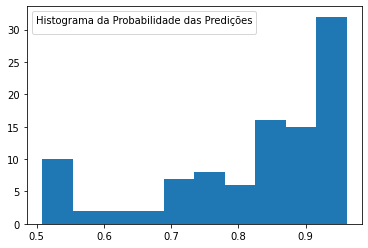

In [455]:
import matplotlib.pyplot as plt


plt.hist(df.prediction_probability)
plt.legend(title='Histograma da Probabilidade das Predições')
plt.show()


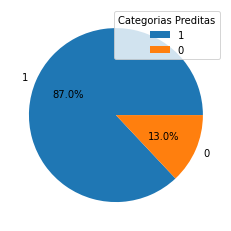

1    87
0    13
Name: prediction, dtype: int64

In [456]:
plt.pie(df.prediction.value_counts(),labels=['1','0'],autopct='%1.1f%%')
plt.legend(title='Categorias Preditas')
plt.show()
df.prediction.value_counts()

In [349]:
ct = pd.crosstab(df.prediction, df.RainToday)
ct

RainToday,0.0,1.0
prediction,,
0,6,6
1,16,72


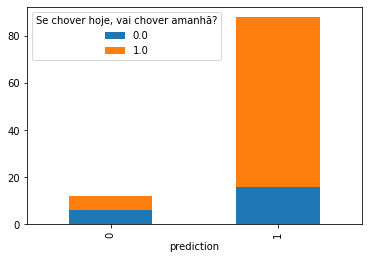

In [454]:
ct.plot.bar(stacked=True)
plt.legend(title='Se chover hoje, vai chover amanhã?')
plt.show()

In [299]:
wos_client.data_sets.get_records_count(payload_data_set_id) # ibm_watson_openscale


4460

In [248]:
monitor_instances_info = wos_client.monitor_instances.show(
    data_mart_id="7b220d7b-3196-43c3-8510-a4f710021a04",
     )


7b220d7b-3196-43c3-8510-a4f710021a04,active,bb7a45c3-15ad-4932-aeb8-8d32d54b8b05,subscription,quality,2021-04-08 16:25:48.434000+00:00,5ddff093-25fa-44f8-abae-fd29659fd0d0
7b220d7b-3196-43c3-8510-a4f710021a04,active,bb7a45c3-15ad-4932-aeb8-8d32d54b8b05,subscription,drift,2021-04-05 15:16:56.829000+00:00,9d51655d-1f57-4061-9df4-8ef20b6ebced
7b220d7b-3196-43c3-8510-a4f710021a04,error,bb7a45c3-15ad-4932-aeb8-8d32d54b8b05,subscription,fairness,2021-04-04 21:30:28.742000+00:00,30bc90c4-8c54-413d-98aa-8d4ff5bb2680
7b220d7b-3196-43c3-8510-a4f710021a04,error,bb7a45c3-15ad-4932-aeb8-8d32d54b8b05,subscription,explainability,2021-04-04 21:28:01.896000+00:00,dcb0abd5-b476-43c0-ba7f-be93ad250d6f
7b220d7b-3196-43c3-8510-a4f710021a04,active,bb7a45c3-15ad-4932-aeb8-8d32d54b8b05,subscription,mrm,2021-04-04 21:23:42.492000+00:00,3748dfc5-7236-406b-be1d-1ca2363c9343
7b220d7b-3196-43c3-8510-a4f710021a04,active,bb7a45c3-15ad-4932-aeb8-8d32d54b8b05,subscription,performance,2021-04-04 21:23:42.488000+00:00,570ab6f2-e0e3-4402-bb78-d8de41331a3e
7b220d7b-3196-43c3-8510-a4f710021a04,active,6812f06b-1a26-4eba-93cf-91b520950a74,instance,performance,2021-03-10 18:28:38.861000+00:00,26bb6bb7-d140-4280-8044-63ec11f7af3b


In [246]:
wos_client.monitor_instances.show_metrics(monitor_instance_id='5ddff093-25fa-44f8-abae-fd29659fd0d0')

In [232]:
# wos_client.monitor_instances.delete(
#         background_mode=False,
#         monitor_instance_id='94e582d5-c244-4533-9697-c16046c5fc40'
#      )





 Waiting for end of deleting monitor instance 94e582d5-c244-4533-9697-c16046c5fc40 




finished

-------------------------------------------------
 Successfully finished deleting monitor instance 
-------------------------------------------------




In [461]:
monitor_instance_run_info = wos_client.monitor_instances.run(
        background_mode=False,
        monitor_instance_id='5ddff093-25fa-44f8-abae-fd29659fd0d0',

     )
     
     




 Waiting for end of monitoring run c6ddefcd-5155-46f5-94ed-fcf2f6529caa 




error

-------------------------------
 Run failed with status: error 
-------------------------------


Reason: ['code: AIQFS0002E, message: Action `Score Batch` has failed with status code 400; associated message: `{2}`', 'code: AIQGS0099E, message: X has 66 features, but this StandardScaler is expecting 61 features as input.']


In [394]:
records2 = wos_client.data_sets.get_list_of_records(data_set_id=feedback_dataset_id,
                                                   output_type=ResponseTypes.PANDAS
   )
df_feed = records2.result


In [412]:
len(df_data.columns)
# df.columns

62

In [436]:
dir(scoring_response)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [453]:
print(scoring_response["predictions"][0].keys)
scoring_response["predictions"][0]["fields"]

<built-in method keys of dict object at 0x7f960d797d80>


['prediction', 'probability']